✅ Saved PCA dataset: heart_disease_pca.csv


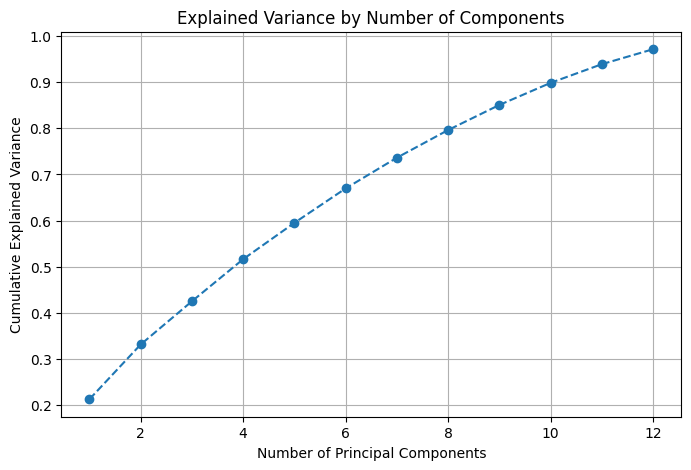

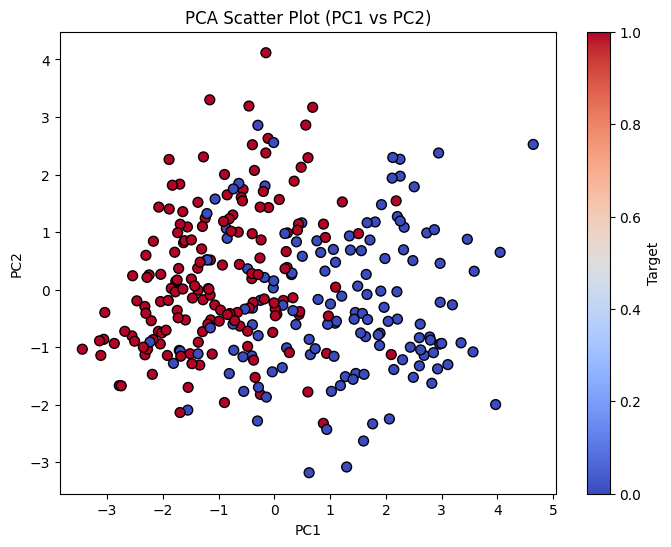

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --------------------------
# Load Preprocessed Data
# --------------------------
df = pd.read_csv("../data/heart_disease_cleaned.csv")

X = df.drop("target", axis=1)
y = df["target"]

# Scale again for PCA (ensures fair variance distribution)
X_scaled = StandardScaler().fit_transform(X)

# --------------------------
# PCA
# --------------------------
pca = PCA(n_components=0.95)  # keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# Save transformed dataset
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df["target"] = y.values
pca_df.to_csv("../data/heart_disease_pca.csv", index=False)
print("✅ Saved PCA dataset: heart_disease_pca.csv")

# --------------------------
# Variance Plot
# --------------------------
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Number of Components")
plt.grid()
plt.show()

# --------------------------
# Scatter Plot (First 2 PCs)
# --------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", edgecolor="k", s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Target")
plt.show()
